# Company Type/Location And Pay Analysis

In [2]:
#Imports
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
from helper_functions import read_sql

In [3]:
#Create Engine

load_dotenv() 
DATABASE_URL = os.getenv("DATABASE_URL")

engine = create_engine(DATABASE_URL)

## Company Type Analysis

In [4]:
company_type_df = read_sql(engine, 2)
company_type_df

,size,name,avg
0,M,MX,208987.500000
1,L,US,163915.671815
2,M,US,156712.045342
3,M,NZ,154015.000000
4,M,CA,149693.092637
5,M,EG,140869.230769
6,M,AU,138695.209302
7,L,CH,137323.142857
8,S,CA,119045.500000
9,S,US,114857.164179


<function matplotlib.pyplot.show(close=None, block=None)>

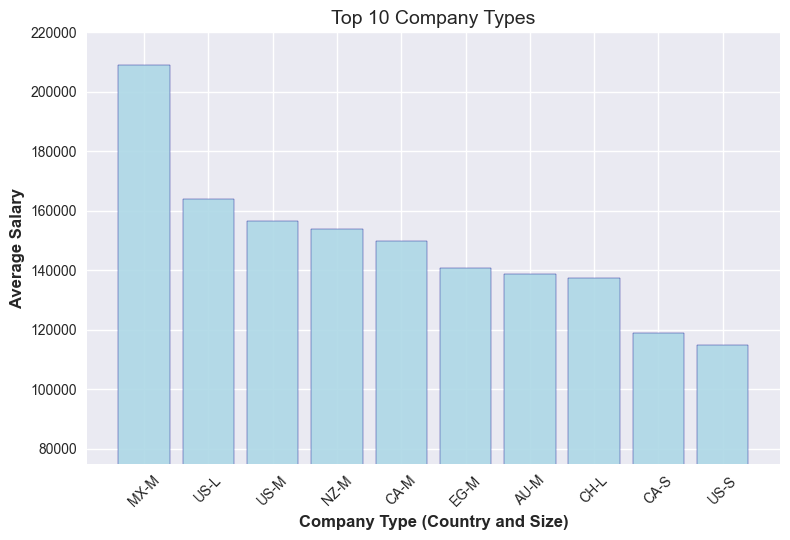

In [5]:
plt.style.use("seaborn-v0_8")

#Combine Identifying Columns
company_type_df["label"] = company_type_df["name"] + "-" + company_type_df["size"]

#Visualize
fig, ax = plt.subplots()
ax.bar(company_type_df["label"], company_type_df["avg"], color='lightblue', edgecolor='darkblue', alpha=0.9)
ax.set_xlabel('Company Type (Country and Size)', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Salary', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Company Types', fontsize=14)
ax.set_ylim(75000, 220000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

## Company Location Analysis

In [6]:
company_location_df = read_sql(engine, 3)
company_location_df

,name,avg
0,US,156904.423130
1,NZ,146761.250000
2,CA,145918.096703
3,EG,140869.230769
4,MX,129240.600000
5,AU,127800.701754
6,CH,124646.888889
7,JP,110821.625000
8,UA,105600.000000
9,IE,104694.916667


<function matplotlib.pyplot.show(close=None, block=None)>

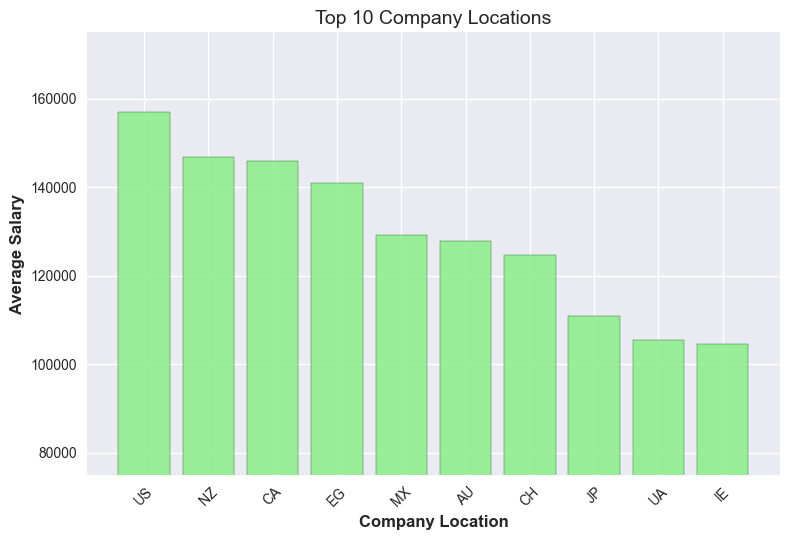

In [7]:
#Visualize
fig, ax = plt.subplots()
ax.bar(company_location_df["name"], company_location_df["avg"], color='lightgreen', edgecolor='darkgreen', alpha=0.9)
ax.set_xlabel('Company Location', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Salary', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Company Locations', fontsize=14)
ax.set_ylim(75000, 175000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

# Top Jobs Per Country

In [8]:
#We'll do the top 6 countries
US_df = read_sql(engine, 1, ('US',))
NZ_df = read_sql(engine, 1, ('NZ',))
CA_df = read_sql(engine, 1, ('CA',))
EG_df = read_sql(engine, 1, ('EG',))
MX_df = read_sql(engine, 1, ('MX',))
AU_df = read_sql(engine, 1, ('AU',))

<function matplotlib.pyplot.show(close=None, block=None)>

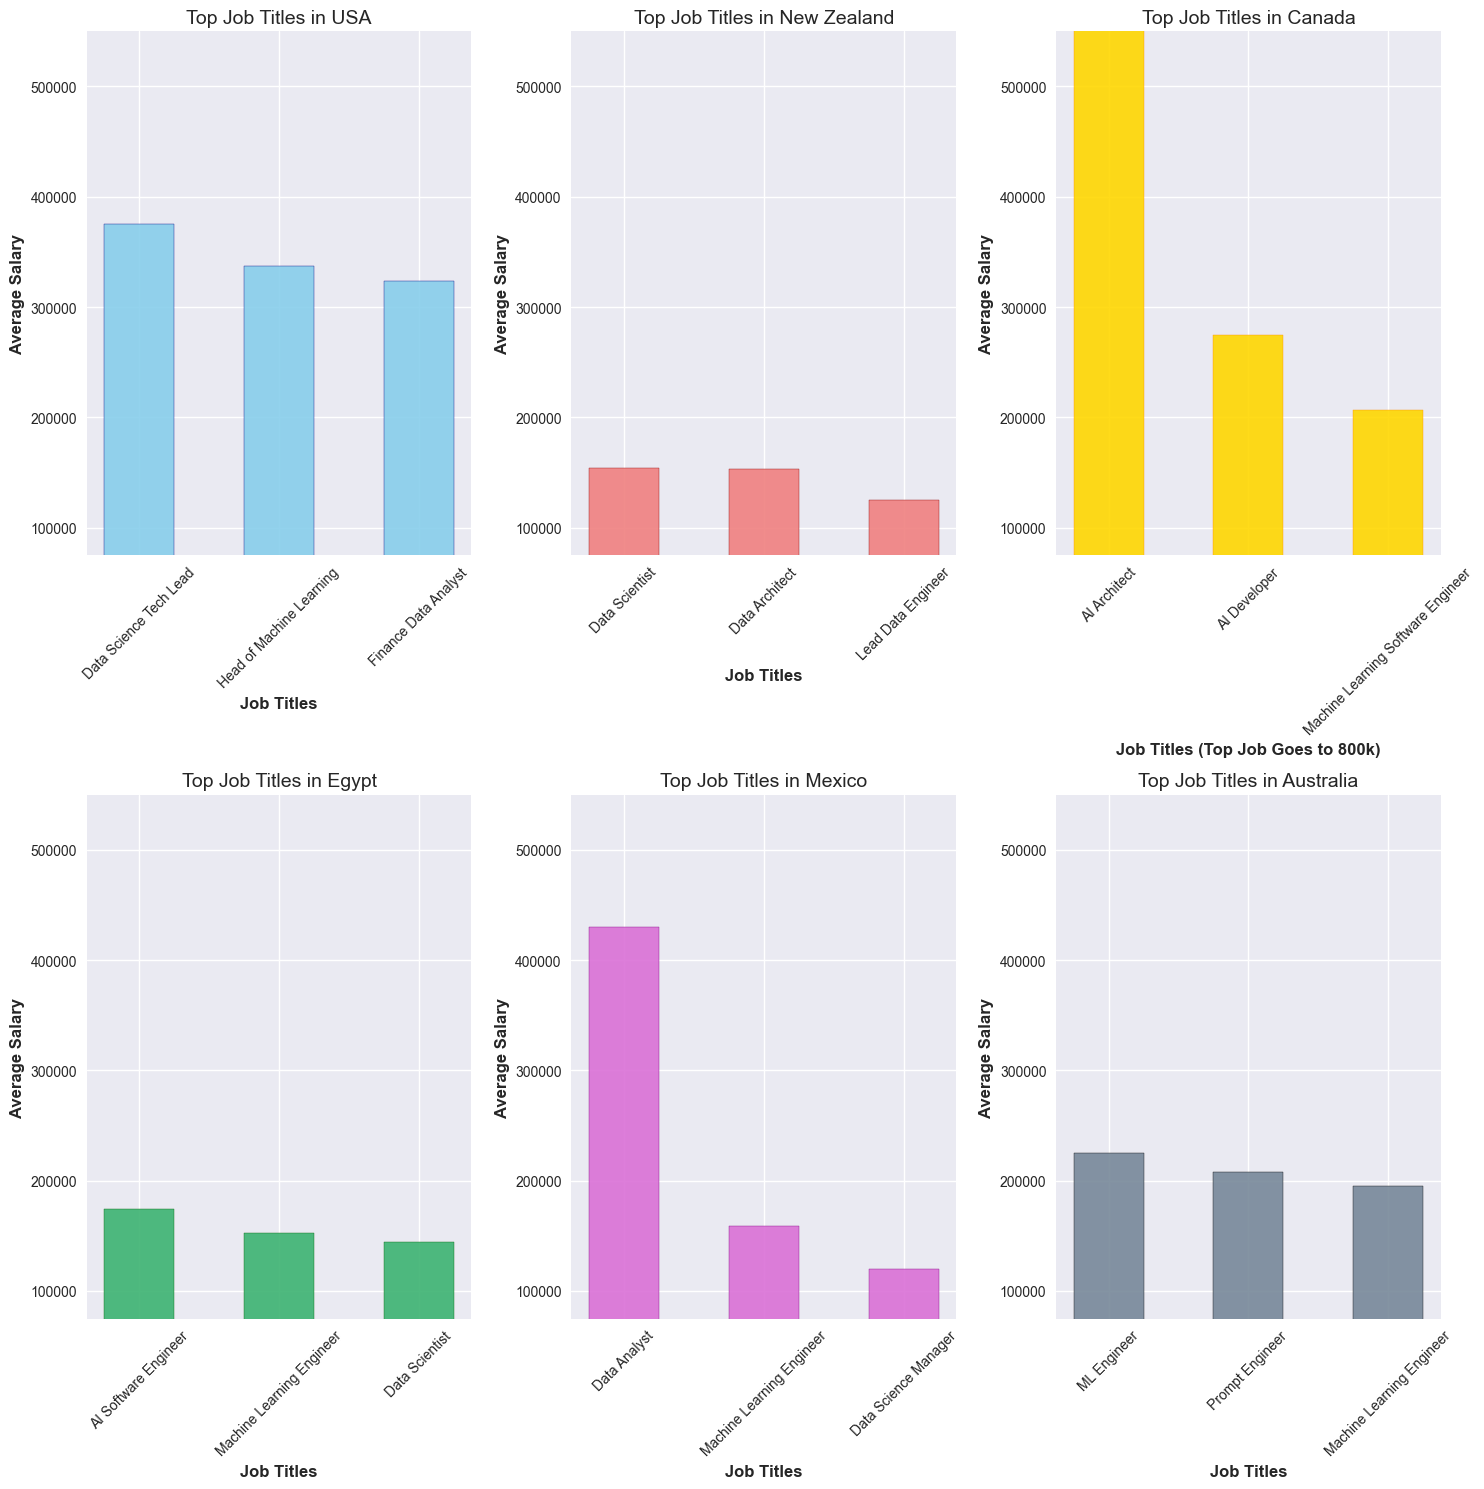

In [10]:
#Visualize
fig, axes = plt.subplots(2,3, figsize=(15,15))

#US
axes[0,0].bar(US_df["job_title"], US_df["avg"], color='skyblue', edgecolor='navy', width=0.5, alpha=0.9)
axes[0,0].set_xlabel('Job Titles', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Average Salary', fontsize=12, fontweight='bold')
axes[0,0].set_title('Top Job Titles in USA', fontsize=14)
axes[0,0].set_ylim(75000, 550000)
axes[0,0].tick_params(axis='x', rotation=45)

#NZ
axes[0,1].bar(NZ_df["job_title"], NZ_df["avg"], color='lightcoral', edgecolor='darkred', width=0.5, alpha=0.9)
axes[0,1].set_xlabel('Job Titles', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Average Salary', fontsize=12, fontweight='bold')
axes[0,1].set_title('Top Job Titles in New Zealand', fontsize=14)
axes[0,1].set_ylim(75000, 550000)
axes[0,1].tick_params(axis='x', rotation=45)

#CA
axes[0,2].bar(CA_df["job_title"], CA_df["avg"], color='gold', edgecolor='darkorange', width=0.5, alpha=0.9)
axes[0,2].set_xlabel('Job Titles (Top Job Goes to 800k)', fontsize=12, fontweight='bold')
axes[0,2].set_ylabel('Average Salary', fontsize=12, fontweight='bold')
axes[0,2].set_title('Top Job Titles in Canada', fontsize=14)
axes[0,2].set_ylim(75000, 550000)
axes[0,2].tick_params(axis='x', rotation=45)

#EG
axes[1,0].bar(EG_df["job_title"], EG_df["avg"], color='mediumseagreen', edgecolor='darkgreen', width=0.5, alpha=0.9)
axes[1,0].set_xlabel('Job Titles', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Average Salary', fontsize=12, fontweight='bold')
axes[1,0].set_title('Top Job Titles in Egypt', fontsize=14)
axes[1,0].set_ylim(75000, 550000)
axes[1,0].tick_params(axis='x', rotation=45)

#MX
axes[1,1].bar(MX_df["job_title"], MX_df["avg"], color='orchid', edgecolor='purple', width=0.5, alpha=0.9)
axes[1,1].set_xlabel('Job Titles', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Average Salary', fontsize=12, fontweight='bold')
axes[1,1].set_title('Top Job Titles in Mexico', fontsize=14)
axes[1,1].set_ylim(75000, 550000)
axes[1,1].tick_params(axis='x', rotation=45)

#AU
axes[1,2].bar(AU_df["job_title"], AU_df["avg"], color='lightslategray', edgecolor='black', width=0.5, alpha=0.9)
axes[1,2].set_xlabel('Job Titles', fontsize=12, fontweight='bold')
axes[1,2].set_ylabel('Average Salary', fontsize=12, fontweight='bold')
axes[1,2].set_title('Top Job Titles in Australia', fontsize=14)
axes[1,2].set_ylim(75000, 550000)
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show